# Real time traffic incident - Exploratory Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
import warnings
import datetime
import datetime as dt
from datetime import date
from datetime import datetime
from scipy.stats import norm
warnings.simplefilter("ignore")

In [2]:
#Loading dataset
traffic_incidences=pd.read_csv('Real-Time_Traffic_Incident_Reports.csv')

In [3]:
traffic_incidences['Reported Date'] = pd.to_datetime(traffic_incidences['Published Date'])

In [4]:
reported_time=pd.DataFrame(traffic_incidences['Reported Date'])

In [5]:
traffic_incidences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257651 entries, 0 to 257650
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Traffic Report ID  257651 non-null  object             
 1   Published Date     257651 non-null  object             
 2   Issue Reported     257651 non-null  object             
 3   Location           257092 non-null  object             
 4   Latitude           257572 non-null  float64            
 5   Longitude          257572 non-null  float64            
 6   Address            257651 non-null  object             
 7   Status             255958 non-null  object             
 8   Status Date        257651 non-null  object             
 9   Reported Date      257651 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 19.7+ MB


In [6]:
#Understanding the dataset
traffic_incidences

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,06/13/2018 06:35:59 AM +0000,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000,2018-06-13 06:35:59+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,06/13/2018 10:15:36 AM +0000,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000,2018-06-13 10:15:36+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,04/17/2020 09:25:03 PM +0000,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000,2020-04-17 21:25:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,04/17/2020 09:40:52 PM +0000,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,04/17/2020 09:55:03 PM +0000,2020-04-17 21:40:52+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,04/17/2020 09:00:55 PM +0000,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,04/17/2020 11:30:04 PM +0000,2020-04-17 21:00:55+00:00
...,...,...,...,...,...,...,...,...,...,...
257646,4AB46ED419587791DCEF1A1E2391AD6C371A26B9_16444...,02/09/2022 02:12:25 PM +0000,Traffic Hazard,"(30.214243,-97.702505)",30.214243,-97.702505,0 Eb Benwhite Svrd To Blvd At Rside Ramp,ARCHIVED,02/09/2022 02:55:02 PM +0000,2022-02-09 14:12:25+00:00
257647,87E371A6459EE0935618D9594F383FB74A43BFDC_16444...,02/09/2022 01:43:32 PM +0000,Traffic Hazard,"(30.167378,-97.786636)",30.167378,-97.786636,9000-9010 S Ih 35 Svrd Sb,ARCHIVED,02/09/2022 03:00:03 PM +0000,2022-02-09 13:43:32+00:00
257648,DB5C7A38682220A648B9DA7964B252D846B03084_16444...,02/09/2022 01:53:53 PM +0000,COLLISION,"(30.391048,-97.887024)",30.391048,-97.887024,4800-5025 N Fm 620 Rd,ARCHIVED,02/09/2022 03:10:02 PM +0000,2022-02-09 13:53:53+00:00
257649,CF9725A2055B246C88258A875D98584BA37189AF_16444...,02/09/2022 01:49:54 PM +0000,Crash Service,"(30.391384,-97.72173)",30.391384,-97.721730,10700-10741 Burnet Rd,ARCHIVED,02/09/2022 03:45:03 PM +0000,2022-02-09 13:49:54+00:00


In [7]:
#looking at first 5 records
traffic_incidences.head(5)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,06/13/2018 06:35:59 AM +0000,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000,2018-06-13 06:35:59+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,06/13/2018 10:15:36 AM +0000,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000,2018-06-13 10:15:36+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,04/17/2020 09:25:03 PM +0000,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000,2020-04-17 21:25:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,04/17/2020 09:40:52 PM +0000,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,04/17/2020 09:55:03 PM +0000,2020-04-17 21:40:52+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,04/17/2020 09:00:55 PM +0000,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,04/17/2020 11:30:04 PM +0000,2020-04-17 21:00:55+00:00


In [8]:
#looking at last 5 records
traffic_incidences.tail(5)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date
257646,4AB46ED419587791DCEF1A1E2391AD6C371A26B9_16444...,02/09/2022 02:12:25 PM +0000,Traffic Hazard,"(30.214243,-97.702505)",30.214243,-97.702505,0 Eb Benwhite Svrd To Blvd At Rside Ramp,ARCHIVED,02/09/2022 02:55:02 PM +0000,2022-02-09 14:12:25+00:00
257647,87E371A6459EE0935618D9594F383FB74A43BFDC_16444...,02/09/2022 01:43:32 PM +0000,Traffic Hazard,"(30.167378,-97.786636)",30.167378,-97.786636,9000-9010 S Ih 35 Svrd Sb,ARCHIVED,02/09/2022 03:00:03 PM +0000,2022-02-09 13:43:32+00:00
257648,DB5C7A38682220A648B9DA7964B252D846B03084_16444...,02/09/2022 01:53:53 PM +0000,COLLISION,"(30.391048,-97.887024)",30.391048,-97.887024,4800-5025 N Fm 620 Rd,ARCHIVED,02/09/2022 03:10:02 PM +0000,2022-02-09 13:53:53+00:00
257649,CF9725A2055B246C88258A875D98584BA37189AF_16444...,02/09/2022 01:49:54 PM +0000,Crash Service,"(30.391384,-97.72173)",30.391384,-97.721730,10700-10741 Burnet Rd,ARCHIVED,02/09/2022 03:45:03 PM +0000,2022-02-09 13:49:54+00:00
257650,9EE516E1256422B2C7CD0402CAD219A36F7E7723_16444...,02/09/2022 01:08:17 PM +0000,Crash Service,"(30.314445,-97.663289)",30.314445,-97.663289,7112 Ed Bluestein Blvd Svrd Sb,ARCHIVED,02/09/2022 03:50:03 PM +0000,2022-02-09 13:08:17+00:00


In [9]:
#sampling the data just trying to see variations in attributes
traffic_incidences.sample(10)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date
94389,F818D3A787EF337609399B092B4C3E0E4BF7D9E6_15351...,08/24/2018 11:46:34 AM +0000,Traffic Hazard,"(30.182873,-97.687638)",30.182873,-97.687638,Burleson Rd & S Us 183 Hwy Nb,ARCHIVED,08/24/2018 11:55:02 AM +0000,2018-08-24 11:46:34+00:00
18808,D584553119A41BDAF5910302B5C7771774ABCD4D_16010...,09/25/2020 12:50:23 PM +0000,Traffic Hazard,"(30.358726,-97.78731)",30.358726,-97.787310,5510-5541 Fm 2222 Rd,ARCHIVED,09/25/2020 01:30:03 PM +0000,2020-09-25 12:50:23+00:00
93240,B949F95479E0CB8E73A521EC6135BA1CD766D865_15346...,08/18/2018 09:05:25 PM +0000,TRFC HAZD/ DEBRIS,"(30.280817,-97.581721)",30.280817,-97.581721,7500-8113 N SH 130 NB,ARCHIVED,08/18/2018 09:20:03 PM +0000,2018-08-18 21:05:25+00:00
106659,F9C49F029B05D0F5EE2A1BCE8752974EC1535343_15403...,10/24/2018 07:32:57 AM +0000,Traffic Hazard,"(30.440528,-97.668446)",30.440528,-97.668446,1514-1537 W WELLS BRANCH PKWY,ARCHIVED,10/24/2018 08:10:03 AM +0000,2018-10-24 07:32:57+00:00
154508,7513F90FC527B77418E58E49C96DF7CD1CEED599_15642...,07/27/2019 04:20:28 AM +0000,Crash Service,"(30.455444,-97.825791)",30.455444,-97.825791,N Fm 620 Rd & Anderson Mill Rd,ARCHIVED,07/27/2019 04:30:05 AM +0000,2019-07-27 04:20:28+00:00
173025,F2779FEB3682526B35EB6A642E38B67D68C654E4_15730...,11/06/2019 04:21:04 AM +0000,Traffic Hazard,"(30.165021,-97.730811)",30.165021,-97.730811,7006-7125 JANES RANCH RD,ARCHIVED,11/06/2019 04:45:04 AM +0000,2019-11-06 04:21:04+00:00
6897,418E19155782FC7F12CED8332C8ED025AEC227A5_15917...,06/09/2020 10:33:24 PM +0000,Crash Urgent,"(30.266637,-97.733844)",30.266637,-97.733844,700-725 N Ih 35 Svrd Nb,ARCHIVED,06/09/2020 11:15:03 PM +0000,2020-06-09 22:33:24+00:00
184319,0F85D55F03E24BEEBF29AA28050587A8E1DB7EEF_15789...,01/13/2020 12:58:06 PM +0000,Crash Urgent,"(30.268093,-97.746633)",30.268093,-97.746633,Guadalupe St & W 5th St,ARCHIVED,01/13/2020 01:05:04 PM +0000,2020-01-13 12:58:06+00:00
21505,0F85D55F03E24BEEBF29AA28050587A8E1DB7EEF_16025...,10/12/2020 11:23:51 AM +0000,Crash Urgent,"(30.255877,-97.890721)",30.255877,-97.890721,Old Bee Caves Rd & Travis Cook Rd,ARCHIVED,10/12/2020 11:55:03 AM +0000,2020-10-12 11:23:51+00:00
21151,63AB910CB3A7BC89FAAE5A46AA337AA22F5F4D30_16020...,10/06/2020 10:24:48 PM +0000,Crash Service,"(30.390681,-97.739468)",30.390681,-97.739468,N Capital Of Texas Hwy Nb & Stonelake Blvd,ARCHIVED,10/06/2020 11:10:03 PM +0000,2020-10-06 22:24:48+00:00


In [10]:
#look at the attributes, data types, and some missing values
traffic_incidences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257651 entries, 0 to 257650
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Traffic Report ID  257651 non-null  object             
 1   Published Date     257651 non-null  object             
 2   Issue Reported     257651 non-null  object             
 3   Location           257092 non-null  object             
 4   Latitude           257572 non-null  float64            
 5   Longitude          257572 non-null  float64            
 6   Address            257651 non-null  object             
 7   Status             255958 non-null  object             
 8   Status Date        257651 non-null  object             
 9   Reported Date      257651 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 19.7+ MB


In [11]:
#Tracing if there are missing values
traffic_incidences.isnull().values.any()

True

In [12]:
#finding which are those columns and rows that have missing missing values
traffic_incidences[traffic_incidences['Location'].isna()]

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date
313,B4916DB7F02E43309DD837DF807056ADBBA18946_15884...,05/02/2020 02:14:29 PM +0000,zSTALLED VEHICLE,NaN,0.0,0.0,Answer&n Ih 35,ARCHIVED,05/02/2020 02:30:03 PM +0000,2020-05-02 14:14:29+00:00
826,B8509B02CC4C001875E9FCB20F3C7C0DF970B5A0_16194...,04/26/2021 02:37:55 AM +0000,Stalled Vehicle,NaN,0.0,0.0,"11,700 BLK S.IH 35 SVC RD SB",ARCHIVED,04/26/2021 03:20:03 AM +0000,2021-04-26 02:37:55+00:00
2425,CF9725A2055B246C88258A875D98584BA37189AF_16039...,10/29/2020 06:22:34 PM +0000,TRFC HAZD/ DEBRIS,NaN,0.0,0.0,1100 blk westlake dr,ARCHIVED,10/29/2020 06:40:03 PM +0000,2020-10-29 18:22:34+00:00
2451,647E959A40EE60F43EE78C3ABBF01102E4600651_15874...,04/20/2020 07:54:01 PM +0000,COLLISION/PRIVATE PROPERTY,NaN,0.0,0.0,3930 BEE CAVE ROAD,ARCHIVED,04/20/2020 08:20:03 PM +0000,2020-04-20 19:54:01+00:00
3303,FE88F21C480D20CF1A1D401A17250DC385A707F9_15901...,05/22/2020 02:52:59 PM +0000,Traffic Hazard,NaN,0.0,0.0,1000 E. RUNDBERG LN,ARCHIVED,05/22/2020 03:00:04 PM +0000,2020-05-22 14:52:59+00:00
...,...,...,...,...,...,...,...,...,...,...
254759,96C71E10C9F797720254BF8AB512C22BEF680B46_16423...,01/16/2022 10:02:28 PM +0000,TRFC HAZD/ DEBRIS,NaN,0.0,0.0,6515 ELROY,ARCHIVED,01/16/2022 10:10:03 PM +0000,2022-01-16 22:02:28+00:00
254863,C18599781823E7340AFF1F2B4D728F0FEBDEC4A6_16424...,01/17/2022 09:35:17 PM +0000,COLLISION,NaN,0.0,0.0,17000 blk west reeds park,ARCHIVED,01/17/2022 10:20:04 PM +0000,2022-01-17 21:35:17+00:00
255839,3FD3280E5B62D32A0078C360EDCB3ACAA2DEA131_16432...,01/26/2022 12:35:48 PM +0000,COLLISN/ LVNG SCN,NaN,0.0,0.0,13222 OLD SAN ANTONIO,ARCHIVED,01/26/2022 01:05:03 PM +0000,2022-01-26 12:35:48+00:00
256105,ADE84D35EA82609A734A4853F889B841F6866F8F_16433...,01/28/2022 03:07:22 PM +0000,Stalled Vehicle,NaN,0.0,0.0,4000 N Ih35 Nb,ARCHIVED,01/28/2022 03:50:03 PM +0000,2022-01-28 15:07:22+00:00


In [13]:
print(len(traffic_incidences[traffic_incidences['Location'].isna()]), 'records dont have location attribute information')

559 records dont have location attribute information


In [14]:
traffic_incidences[traffic_incidences['Latitude'].isna()]

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date
22548,366ED27E3ED6AB3618F8E6CBFF6D423B53BC459D_15248...,04/27/2018 07:05:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,10700 N IH 35,NaN,04/27/2018 07:10:00 AM +0000,2018-04-27 07:05:00+00:00
26823,A1EB7CE1B3132D269F15ACD9C978C481C9389506,10/04/2017 05:22:00 PM +0000,Traffic Hazard,NaN,NaN,NaN,2000-blk S Mopac Expy Sb,ARCHIVED,05/18/2018 01:00:00 AM +0000,2017-10-04 17:22:00+00:00
27849,BA0B087E84A54FD1CAD7C38A91695633A0C0A859_15232...,04/09/2018 02:08:00 PM +0000,Traffic Hazard,NaN,NaN,NaN,12700 S I 35 SB SRVC,ARCHIVED,04/09/2018 02:45:00 PM +0000,2018-04-09 14:08:00+00:00
28266,2192F9498F37E8D5F2BBA41585B5C7ED4D0DB457_15165...,01/21/2018 09:40:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,13700 N US HWY 183 SVRD SB,ARCHIVED,01/21/2018 03:50:00 PM +0000,2018-01-21 09:40:00+00:00
29420,A7095041184FCA321A7B69AFA0B28972142BC486_15265...,05/17/2018 11:36:00 AM +0000,Crash Service,NaN,NaN,NaN,1900 blk e. william cannon dr,ARCHIVED,05/17/2018 11:50:00 AM +0000,2018-05-17 11:36:00+00:00
...,...,...,...,...,...,...,...,...,...,...
74799,A66AB96FFF76B3C3C2810151921B30CE73DF0D0D,09/28/2017 06:34:00 PM +0000,COLLISION,NaN,NaN,NaN,8200-BLK W US 290 HWY,ARCHIVED,05/18/2018 01:00:00 AM +0000,2017-09-28 18:34:00+00:00
74865,AB165CB90D19598F610A669DFE4798F4CD049A6A,10/06/2017 11:14:00 PM +0000,Crash Urgent,NaN,NaN,NaN,0 Fm 2222 Rd & N Fm 620 Rd,ARCHIVED,05/18/2018 01:00:00 AM +0000,2017-10-06 23:14:00+00:00
74914,CB197B480A07A794B94CA9D50661DB1FAD2E3873_15266...,05/18/2018 06:31:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,5600 blk N IH35 NB,ARCHIVED,05/18/2018 06:40:00 AM +0000,2018-05-18 06:31:00+00:00
77016,4375A23DFC4B20CB97C25EBE3B52488C61293AC2_15275...,05/29/2018 06:00:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,9700 blk S. IH35 n&b,ARCHIVED,05/29/2018 06:30:00 AM +0000,2018-05-29 06:00:00+00:00


In [15]:
traffic_incidences[traffic_incidences['Longitude'].isna()]

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date
22548,366ED27E3ED6AB3618F8E6CBFF6D423B53BC459D_15248...,04/27/2018 07:05:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,10700 N IH 35,NaN,04/27/2018 07:10:00 AM +0000,2018-04-27 07:05:00+00:00
26823,A1EB7CE1B3132D269F15ACD9C978C481C9389506,10/04/2017 05:22:00 PM +0000,Traffic Hazard,NaN,NaN,NaN,2000-blk S Mopac Expy Sb,ARCHIVED,05/18/2018 01:00:00 AM +0000,2017-10-04 17:22:00+00:00
27849,BA0B087E84A54FD1CAD7C38A91695633A0C0A859_15232...,04/09/2018 02:08:00 PM +0000,Traffic Hazard,NaN,NaN,NaN,12700 S I 35 SB SRVC,ARCHIVED,04/09/2018 02:45:00 PM +0000,2018-04-09 14:08:00+00:00
28266,2192F9498F37E8D5F2BBA41585B5C7ED4D0DB457_15165...,01/21/2018 09:40:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,13700 N US HWY 183 SVRD SB,ARCHIVED,01/21/2018 03:50:00 PM +0000,2018-01-21 09:40:00+00:00
29420,A7095041184FCA321A7B69AFA0B28972142BC486_15265...,05/17/2018 11:36:00 AM +0000,Crash Service,NaN,NaN,NaN,1900 blk e. william cannon dr,ARCHIVED,05/17/2018 11:50:00 AM +0000,2018-05-17 11:36:00+00:00
...,...,...,...,...,...,...,...,...,...,...
74799,A66AB96FFF76B3C3C2810151921B30CE73DF0D0D,09/28/2017 06:34:00 PM +0000,COLLISION,NaN,NaN,NaN,8200-BLK W US 290 HWY,ARCHIVED,05/18/2018 01:00:00 AM +0000,2017-09-28 18:34:00+00:00
74865,AB165CB90D19598F610A669DFE4798F4CD049A6A,10/06/2017 11:14:00 PM +0000,Crash Urgent,NaN,NaN,NaN,0 Fm 2222 Rd & N Fm 620 Rd,ARCHIVED,05/18/2018 01:00:00 AM +0000,2017-10-06 23:14:00+00:00
74914,CB197B480A07A794B94CA9D50661DB1FAD2E3873_15266...,05/18/2018 06:31:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,5600 blk N IH35 NB,ARCHIVED,05/18/2018 06:40:00 AM +0000,2018-05-18 06:31:00+00:00
77016,4375A23DFC4B20CB97C25EBE3B52488C61293AC2_15275...,05/29/2018 06:00:00 AM +0000,Traffic Hazard,NaN,NaN,NaN,9700 blk S. IH35 n&b,ARCHIVED,05/29/2018 06:30:00 AM +0000,2018-05-29 06:00:00+00:00


In [16]:
traffic_incidences[traffic_incidences['Address'].isna()]

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Reported Date


Location attribute has no missing(Nan) data

From the above exploration, it seems that there location, latitude and longutude have some missing data
which would lead us to deleting the rows that correspond to this rows but imma not gonna delete them 
because the column of location still have information and i can use it whenever i wanna know the locations 
furthermore don't see how deleting these rows would be important for this analysis.

For now imma going to show how i can delete the rows with incomplete data but the codes gonna be commented 
since deleting these rows gonna not be significant in my analysis

In [17]:
#Droping/Deleting null/missing/NaN values
#traffic_incidence_no_nan=traffic_incidences.dropna()

In [18]:
#verifing datatypes of attributes again
#traffic_incidence_no_nan.info()

As you can see, now the rows with missing values are deleted

# Visualisation and findings

In [19]:
# graph1:histograph/bar graph where x is incident y counts done
# graph2:time series x is 2017-2022 y-incident 
# graph3:hours x and incident on y
# table:places with higher incidences    

In [20]:
#Traffic incidences time series

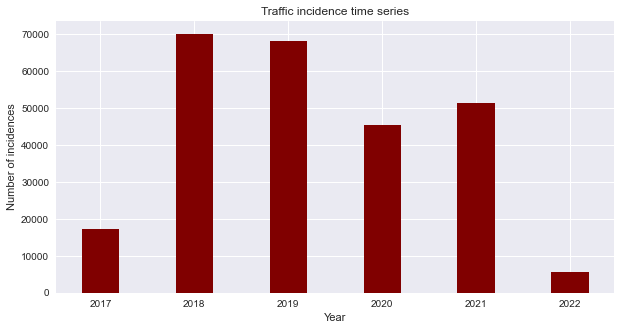

In [21]:
fig = plt.figure(figsize = (10, 5))
for year in range(pd.DatetimeIndex(traffic_incidences['Reported Date']).year.min() ,pd.DatetimeIndex(traffic_incidences['Reported Date']).year.max()+1):
    counts=traffic_incidences[pd.DatetimeIndex(traffic_incidences['Reported Date']).year ==year].count()
    plt.bar(year, counts, color ='maroon',width = 0.4)
    
#creating the bar plot
plt.xlabel("Year")
plt.ylabel("Number of incidences")
plt.title("Traffic incidence time series")
plt.show()

In [22]:
#monthly

In [23]:
all_months=range(pd.DatetimeIndex(traffic_incidences['Reported Date']).month.min() ,pd.DatetimeIndex(traffic_incidences['Reported Date']).month.max()+1)
months_counts=[]
for month in all_months:
    counts=traffic_incidences[pd.DatetimeIndex(traffic_incidences['Reported Date']).month ==month]['Traffic Report ID'].count()
    months_counts.append(counts)

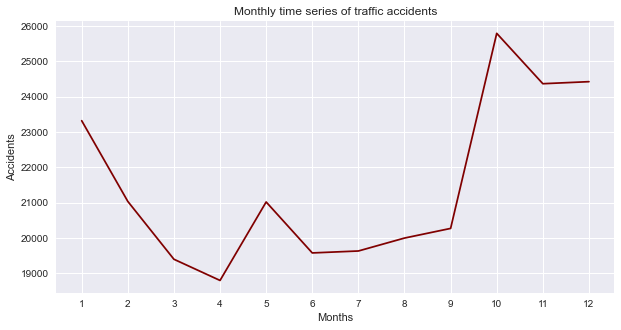

In [24]:
all_months=list(all_months)
fig = plt.figure(figsize = (10, 5))
plt.plot(all_months, months_counts, label="Incident",color ='maroon')
plt.xlabel("Months")
plt.xticks(all_months)
plt.title("Monthly time series of traffic accidents")
plt.ylabel("Accidents")
#plt.legend()
plt.show()

In [25]:
#hourly time series

In [26]:
hours_list=list(pd.DatetimeIndex(traffic_incidences['Reported Date']).hour)
all_hours=list(np.sort(pd.Series(hours_list).unique()))

hours_counts=[]
for hour in all_hours:
    counts=traffic_incidences[pd.DatetimeIndex(traffic_incidences['Reported Date']).hour ==hour]['Traffic Report ID'].count()
    hours_counts.append(counts)

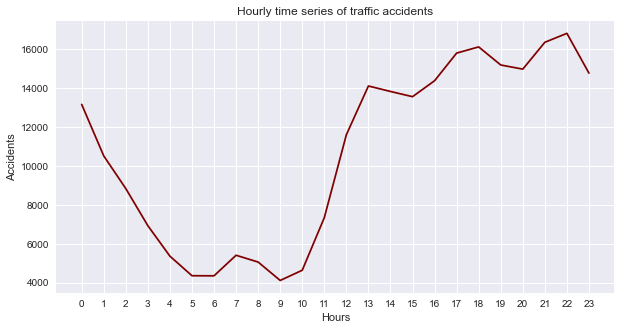

In [27]:
fig = plt.figure(figsize = (10, 5))
plt.plot(all_hours, hours_counts, label="Incident",color ='maroon')
plt.xlabel("Hours")
plt.xticks(all_hours)
plt.title("Hourly time series of traffic accidents")
plt.ylabel("Accidents")
#plt.legend()
plt.show()

In [28]:
Issues_reported=pd.DataFrame(traffic_incidences['Issue Reported'].value_counts()) #accidents that happen frequently
Issues_reported.rename(columns = {'Issue Reported':'Number of Issues reported'}, inplace = True)
Issues_reported.T

,Traffic Hazard,Crash Urgent,Crash Service,COLLISION,TRFC HAZD/ DEBRIS,zSTALLED VEHICLE,Traffic Impediment,COLLISION WITH INJURY,LOOSE LIVESTOCK,COLLISN/ LVNG SCN,...,BOAT ACCIDENT,TRAFFIC FATALITY,AUTO/ PED,ICY ROADWAY,FLEET ACC/ INJURY,OBSTRUCT HWY,N / HZRD TRFC VIOL,FLEET ACC/ FATAL,HIGH WATER,COLLISN / FTSRA
Number of Issues reported,79481,60797,38299,22897,18208,8930,6255,6230,6177,4424,...,102,69,68,61,35,7,7,3,2,1


In [29]:
incidences=list(Issues_reported.index)

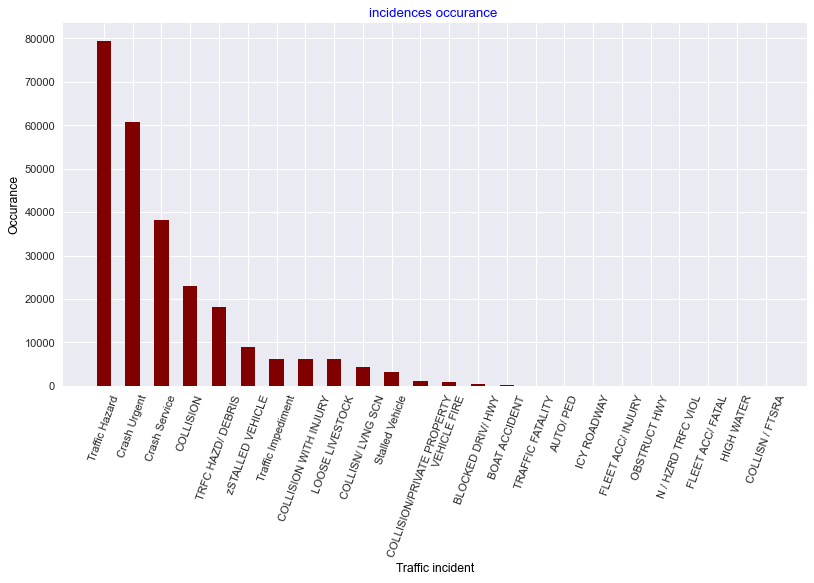

In [30]:
plt.figure(figsize=(12, 6),dpi=80)
plt.bar(incidences, Issues_reported['Number of Issues reported'], color ='maroon',width = 0.5)
plt.xlabel("Traffic incident", color='black')
plt.xticks(incidences, rotation=70)
plt.ylabel("Occurance", color='black')
plt.title("incidences occurance ", color='blue')
plt.show()

In [31]:
#what are the spots/addresses where accidents are most likely to take place.

In [32]:
address=pd.DataFrame(traffic_incidences['Address'].value_counts()) #places where many accidents happen

In [33]:
#top 5 places where most incidences took place
top5accidents_spots=address.head(5)
top5accidents_spots.rename(columns = {'Address':'frequency'}, inplace = True)
top5accidents_spots

,frequency
E Parmer Ln & Dessau Rd,184
9300 S Ih 35 Svrd Sb,171
E Riverside Dr & S Pleasant Valley Rd,161
Fm 969 Rd & N Fm 973 Rd,157
Dessau Rd & E Parmer Ln,154


In [34]:
#Last 5 places where less incidences/accidents took place
address.tail(5).T

,7200-7324 Red Pebble Rd,11100 - 11106 SANTA CRUZ DR,13301 Mizzen St,4206-4320 Greystone Dr,900-1008 S SH 130 SVRD SB
Address,1,1,1,1,1


In [35]:
#Status of reported incident
incidence_status=pd.DataFrame(traffic_incidences['Status'].value_counts())

In [36]:
incidence_status
incidence_status.rename(columns = {'Status':'counts'}, inplace = True)
incidence_status.T

,ARCHIVED,ACTIVE
counts,255955,3


In [37]:
Total_incidences=len(traffic_incidences)
print(F'All traffic Issues reported: {Total_incidences}')

All traffic Issues reported: 257651


# Next On: -Building interactive dashboard using Dash-plotyly or power Bi-Automation of analytics tasks   -Finally doing predictions(Building machine learning models)    